In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1: Tablas de Crecimiento
   1. Descargar dataset en CSV

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/wtageinf.csv")
dataset

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,32.5,-0.955723,13.340229,0.115115,10.957219,11.209345,11.620537,12.377573,13.340229,14.461065,15.639570,16.439044,17.002447
72,2,33.5,-0.974381,13.489134,0.116193,11.064747,11.320538,11.738058,12.507913,13.489134,14.634908,15.843647,16.666048,17.246809
73,2,34.5,-0.991981,13.638774,0.117286,11.172248,11.431774,11.855740,12.638647,13.638774,14.809981,16.049626,16.895526,17.494115
74,2,35.5,-1.008641,13.789365,0.118387,11.279999,11.543323,11.973842,12.770013,13.789365,14.986470,16.257667,17.127623,17.744504


   2. Graficar las curvas correspondientes a cada percentil para niños y niñas   
    * a. En la columna Sex, 1 representa a niños y 2 a niñas
    * b. Las curvas de los percentiles correspondientes a un mismo sexo deben 
       ir en un mismo gráfico.
    c. Un gráfico para cada sexo.

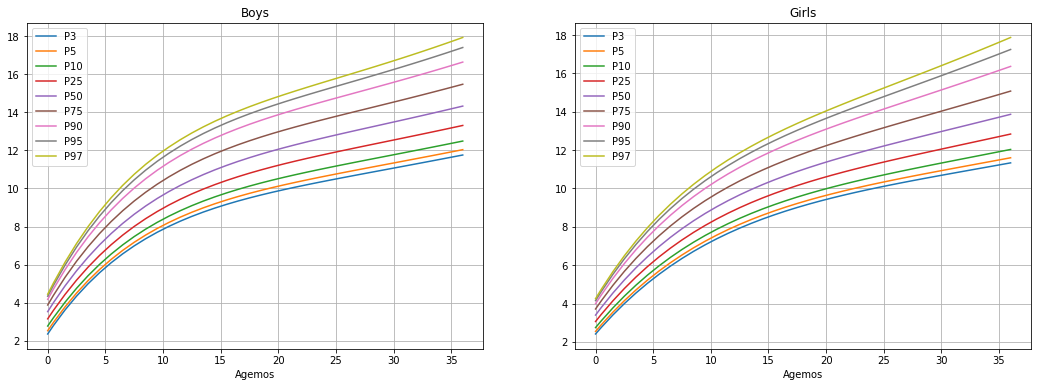

In [8]:
df = dataset
fig, ax = plt.subplots(1, 2 , figsize=(18, 6))
df[df.Sex == 1].plot(
    x='Agemos', 
    y=['P3',	'P5',	'P10',	'P25',	'P50',	'P75',	'P90',	'P95', 'P97'],
    ax=ax[0])
df[df.Sex == 2].plot(
    x='Agemos', 
    y=['P3',	'P5',	'P10',	'P25',	'P50',	'P75',	'P90',	'P95', 'P97'],
    ax=ax[1])
ax[0].grid(True)
ax[0].set_title("Boys")
ax[1].grid(True)
ax[1].set_title("Girls")
plt.show()

### Ejercicio 2: Pasos Fronterizos
   1. Descargar dataset en JSON:


In [4]:
data = pd.read_json(
    "https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/pasos.json"
    )
data

,province,location,name
0,Tierra del Fuego,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA )
1,Tierra del Fuego,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA
2,Tierra del Fuego,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA)
3,Tierra del Fuego,"[-54.8019121, -68.3029511]",PUERTO USHUAIA
4,Santa Cruz,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS
...,...,...,...
247,Chubut,"[-45.2213569, -71.3610803]",PASO PAMPA ALTA
248,Santa Cruz,"[-48.8772007, -72.7288579]",PASO PORTEZUELO DE LA DIVISORIA
249,Buenos Aires,"[-34.1176359, -57.9897668]",ROU COLONIA
250,Buenos Aires,"[-34.1176359, -57.9897668]",ROU COLONIA


 2. Graficar un gráfico de barras agrupando por valor del atributo `"povince"`.


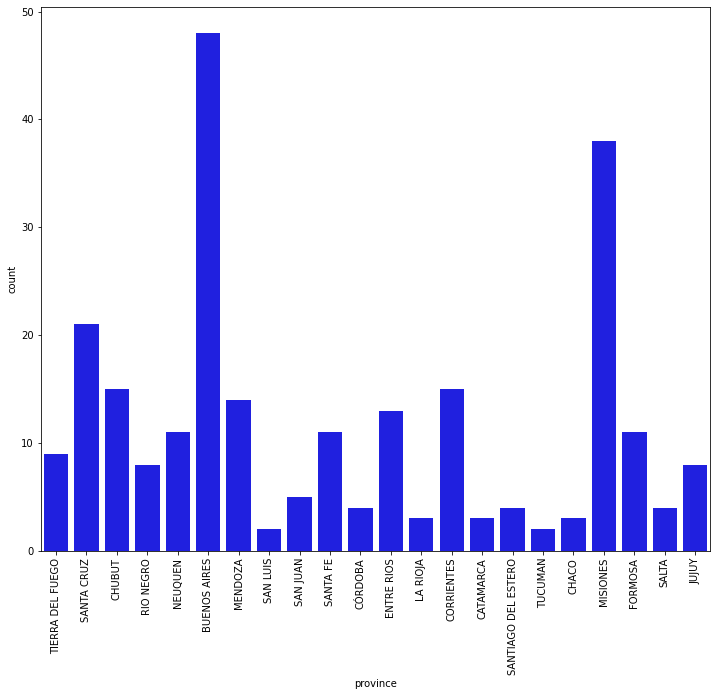

In [5]:
fig, ax = plt.subplots(1, 1 , figsize=(12,10))

data.province = data.province.str.upper()
data.province = data.province.str.replace('CORDOBA','CÓRDOBA')
data.province[data.province.str.contains('AER')] = 'SANTA CRUZ' 

sns.countplot(x='province', data=data, color='b', ax=ax)
plt.xticks(rotation=90)
plt.show()

### Ejercicio 3: Representación de grafos


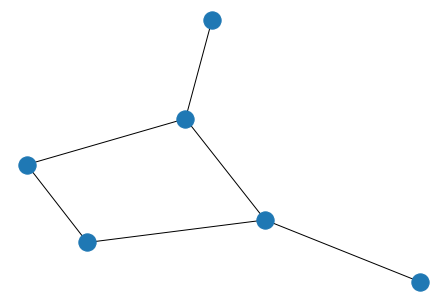

In [6]:
import networkx as nx
graph = nx.Graph()
edge_list = [[0, 2], [1, 3], [2, 3], [2, 4], [3, 5], [4, 5]]

graph.add_edges_from(edge_list)
nx.draw(graph)
plt.show()

In [11]:
adj_matrix = [
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0]]
adj_matrix

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0]]

In [13]:
adj_list = [
    [0, 2],
    [1, 3],
    [2, 3, 4],
    [3, 5],
    [4, 5],
    [5]
]
adj_list

[[0, 2], [1, 3], [2, 3, 4], [3, 5], [4, 5], [5]]